## Dipole's Emission near Waveguide
Zhaohua Tian
2021 07 10

##  Simualte the mode

In [1]:
import meep as mp
from meep import mpb
import numpy as np
from matplotlib import pyplot as plt

omega = 1/0.78
# index of material
index_SiN=2.02
index_SiO2=1.46
index_PVA=1.5
index_An=1.8
# The size of the guide
width=0.65
height=0.25

height_An=0.2
height_PVA=0.03

# The size of simulation domain
width_cal=2.5
length_cal=2.5
height_cal=2.5

# Thinkness of PML
t_pml=0.4

# The size of box to obatin the dipole power
size_x=0.3
size_y=0.3
size_z=0.3

# The position of dipole
pos_x=0
pos_y=0
pos_z=height+0.005

resolution=50
numx=int(width_cal*resolution)
numy=int(height_cal*resolution)
x_list=np.linspace(-width_cal/2,width_cal/2,numx)
y_list=np.linspace(-height_cal/2,height_cal/2,numy)
x_grid,y_grid=np.meshgrid(x_list,y_list)
# %%
cell_size = mp.Vector3(length_cal,width_cal,height_cal)

pml_layers = [mp.Absorber(thickness=t_pml,direction=mp.Y),
                   mp.PML(thickness=t_pml,direction=mp.Z),
                   mp.PML(thickness=t_pml,direction=mp.X)]

# Y dipole 
source = [mp.Source(mp.ContinuousSource(frequency= omega), 
            component = mp.Ex, center=mp.Vector3(0, 0, 0.255) )]

geometry = [mp.Block(material=mp.Medium(epsilon=index_SiN**2), 
                     size=mp.Vector3(mp.inf,width, height),
                     center=mp.Vector3(0, 0, height/2)),

            mp.Block(material=mp.Medium(epsilon=index_SiO2**2),
                     size=mp.Vector3(mp.inf,mp.inf, height_cal/2),
                     center=mp.Vector3(0, 0, -height_cal/4)),

            mp.Block(material=mp.Medium(epsilon=index_An**2),
                     size=mp.Vector3(mp.inf,mp.inf, height_An),
                     center=mp.Vector3(0, 0, height+height_An/2)),
            mp.Block(material=mp.Medium(epsilon=index_PVA**2),
                     size=mp.Vector3(mp.inf,mp.inf, height_PVA),
                     center=mp.Vector3(0, 0, height+height_An+height_PVA/2))
                     ]

Using MPI version 3.1, 1 processes


In [2]:
geometry_lattice = mp.Lattice(size=mp.Vector3(0, width_cal, height_cal))
num_modes = 1
ms = mpb.ModeSolver(
    geometry_lattice = geometry_lattice,
    geometry         = geometry,
    resolution       = resolution,
    num_bands        = num_modes)
# ms.init_sim()
# %%
E = []
store_fields = lambda ms_temp, mode: E.append(ms_temp.get_efield(which_band=mode,bloch_phase=False))    

mode=1
k = ms.find_k(
    mp.NO_PARITY, # p
    omega, # omega
    mode, # band_min
    mode, # band_max
    mp.Vector3(1,0,0), # korig_and_kdir
    1e-4, # tol
    omega * 2, # kmag_guess
    omega * 0.1, # kmag_min
    omega * 4, # kmag_max
    store_fields # band_funcs
    )

Initializing eigensolver data
Computing 1 bands with 1e-07 tolerance
Working in 3 dimensions.
Grid size is 1 x 125 x 125.
Solving for 1 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 2.5, 0)
     (0, 0, 2.5)
Cell volume = 6.25
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 0.4, -0)
     (0, -0, 0.4)
Geometric objects:
     block, center = (0,0,0.125)
          size (1e+20,0.65,0.25)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (0,0,-0.625)
          size (1e+20,1e+20,1.25)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (0,0,0.35)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (0,0,0.465)
          size (1e+20,1e+20,0.03)
          axes (1,0,0), (0,1,0), (0,0,1)
Geometric object tree has depth 3 and 17 object nodes (vs. 4 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: .
Initializing field

epsilon: 1-4.0804, mean 1.93372, harm. mean 1.60169, 66.4% > 1, 30.3117% "fill"
Current band: 1


<ipython-input-5-d7129c787b36>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x_grid,y_grid,np.abs(Ex), cmap='jet', alpha=0.9)
<ipython-input-5-d7129c787b36>:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x_grid,y_grid,np.abs(Ey), cmap='jet', alpha=0.9)
<ipython-input-5-d7129c787b36>:27: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corn

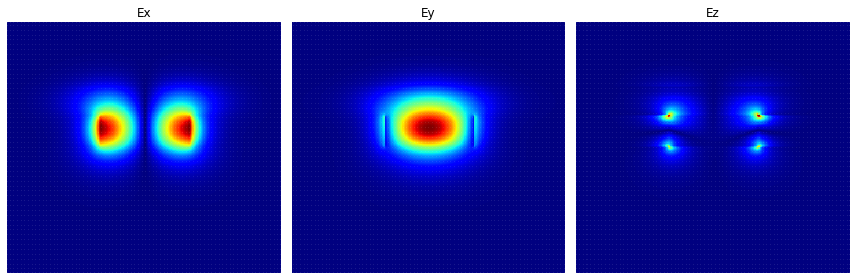

<Figure size 432x288 with 0 Axes>

In [5]:
# %%
neff=k[0]/omega
eps = ms.get_epsilon()
eps_arr=np.transpose(np.array(eps))

# %%
plt.figure(figsize=(12,4))
# Plot the E fields
mode=0
Ex=np.squeeze(E[mode][:,:,0,0]).transpose()
Ey=np.squeeze(E[mode][:,:,0,1]).transpose()
Ez=np.squeeze(E[mode][:,:,0,2]).transpose()

print('Current band: {}'.format(mode+1))
plt.subplot(1,3,1)
# plt.pcolormesh(x_grid,y_grid,eps.transpose(), cmap='binary')
plt.pcolormesh(x_grid,y_grid,np.abs(Ex), cmap='jet', alpha=0.9)
plt.axis('off')
plt.title('Ex')
plt.subplot(1,3,2)
# plt.pcolormesh(x_grid,y_grid,eps.transpose(), cmap='binary')
plt.pcolormesh(x_grid,y_grid,np.abs(Ey), cmap='jet', alpha=0.9)
plt.axis('off')
plt.title('Ey')
plt.subplot(1,3,3)
# plt.pcolormesh(x_grid,y_grid,eps.transpose(), cmap='binary')
plt.pcolormesh(x_grid,y_grid,np.abs(Ez), cmap='jet', alpha=0.9)
plt.axis('off')
plt.title('Ez')
plt.tight_layout()
plt.savefig('SimulatedField_onChip.png')
plt.show()

<ipython-input-6-f0bc7858823b>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x_grid,y_grid,eps_arr,  cmap='jet')


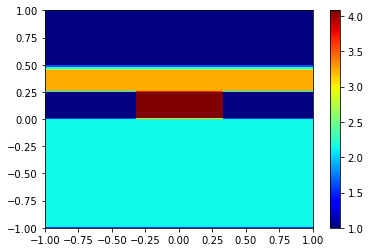

In [6]:
fig1=plt.figure()
plt.pcolormesh(x_grid,y_grid,eps_arr,  cmap='jet')
plt.colorbar()
plt.savefig('StructuresonChip.png')
plt.show()

# Simulate the dipole power and mode power

In [ ]:
sim = mp.Simulation(resolution=resolution,
                    cell_size=cell_size,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=source,
                    eps_averaging= False,
                    Courant = 0.5)

box_1 = sim.add_mode_monitor(omega, 0, 1,
mp.FluxRegion(center=mp.Vector3(0.2, 0, 0),
                         size=mp.Vector3(0,width_cal,height_cal)))  
box_2 = sim.add_mode_monitor(omega, 0, 1,
mp.FluxRegion(center=mp.Vector3(-0.2, 0, 0),
                         size=mp.Vector3(0,width_cal,height_cal))) 


box_x1 = sim.add_flux(omega, 0, 1,
mp.FluxRegion(center=mp.Vector3(pos_x-size_x/2,pos_y,pos_z),size=mp.Vector3(0,size_y,size_z)))
box_x2 = sim.add_flux(omega, 0, 1,
mp.FluxRegion(center=mp.Vector3(pos_x+size_x/2,pos_y,pos_z),size=mp.Vector3(0,size_y,size_z)))

box_y1 = sim.add_flux(omega, 0, 1,
mp.FluxRegion(center=mp.Vector3(pos_x,pos_y-size_y/2,pos_z),size=mp.Vector3(size_x,0,size_z)))
box_y2 = sim.add_flux(omega, 0, 1,
mp.FluxRegion(center=mp.Vector3(pos_x,pos_y+size_y/2,pos_z),size=mp.Vector3(size_x,0,size_z)))

box_z1 = sim.add_flux(omega, 0, 1,
mp.FluxRegion(center=mp.Vector3(pos_x,pos_y,pos_z-size_z/2),size=mp.Vector3(size_x,size_y,0)))
box_z2 = sim.add_flux(omega, 0, 1,
mp.FluxRegion(center=mp.Vector3(pos_x,pos_y,pos_z+size_z/2),size=mp.Vector3(size_x,size_y,0)))

# %%
# sim.run(until_after_sources=
# mp.stop_when_fields_decayed(20, mp.Ey, pt, 1e-3))
# sim.run(until_after_sources=20)
sim.run(until=20)
# %%
x1 = mp.get_fluxes(box_x1)
x2 = mp.get_fluxes(box_x2)
y1 = mp.get_fluxes(box_y1)
y2 = mp.get_fluxes(box_y2)
z1 = mp.get_fluxes(box_z1)
z2 = mp.get_fluxes(box_z2)

mode1 = sim.get_eigenmode_coefficients(box_1,
                      [1], eig_parity=mp.NO_PARITY)
mode2 = sim.get_eigenmode_coefficients(box_2,
                      [1], eig_parity=mp.NO_PARITY)

# %%
ptotal = -x1[0]+x2[0]-y1[0]+y2[0]-z1[0]+z2[0]
pmode_1 = abs(mode1.alpha[0,0,0])**2
pmode_2 = abs(mode2.alpha[0,0,1])**2
effic_1=pmode_1/ptotal
effic_2=pmode_2/ptotal
neff1 = mode1.kdom[0].x/omega
neff2 = mode2.kdom[0].x/omega
print(neff1)
print(neff2)
print("efficency to position direction:, {} ".format(effic_1))
print("efficency to negative direction:, {} ".format(effic_2))

The simulated results are 
```bash
1.7759855991543263
1.775985599154327
efficency to position direction:, 0.11820081868296818 
efficency to negative direction:, 0.11759878002036443 
Elapsed run time = 2109.8321 s
```
which agrees well with my COMSOL and Lumerical FDTD-Solutions Results